# Access Spotify API

### Import Packages

In [1]:
import spotipy
import spotipy.oauth2 as oauth2
import json
import time
import sys
import spotipy.util as util
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.set(style="darkgrid")
import statistics as stat

### Authorize

In [2]:
credentials = oauth2.SpotifyClientCredentials(
        client_id= 'YOUR_CLIENT_ID',
        client_secret='CLIENT_SECRET')

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)
##

if len(sys.argv) > 1:
    tid = sys.argv[1]
else:
    tid = 'spotify:track:5fS5doIeqkuPnW0FOZrof0'

start = time.time()
analysis = spotify.audio_features(tid)
delta = time.time() - start
print(json.dumps(analysis, indent=4))
print ("analysis retrieved in %.2f seconds" % (delta,))


/Users/stasianik/opt/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  """


[
    null
]
analysis retrieved in 0.14 seconds


### Explore an artist's album

In [3]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


### Explore a playlist

In [5]:
playlist_creator = "stasia_"
playlist_id = "58035l005GSfBLqTyylju1"

In [28]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","popularity","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = spotify.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        #playlist_features["genres"] = artists["artists"]["genres"]
        
        # Get audio features
        audio_features = spotify.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [29]:
playlist_df = analyze_playlist(playlist_creator, playlist_id)

In [30]:
playlist_df.head()

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Heretoir,The Circle,Golden Dust,4nVuebCW2HxCAmTEpBSapc,33,0.3960,0.815,7,-7.290,0,0.0406,0.855,0.0813,0.0443,140.026,386907,4
1,Les Discrets,Septembre et ses dernières pensées,L'échappée,4mDfXzDAb9x2ASTDktcMJQ,37,0.3940,0.867,3,-5.801,0,0.0330,0.783,0.1600,0.4090,76.963,243520,4
2,Alcest,Les voyages de l'âme,Autre temps,38cEFxU4h05Aa0BgzWrNyy,44,0.2400,0.548,1,-8.378,0,0.0324,0.875,0.0941,0.1270,127.342,350320,4
3,Caspian,Dust and Disquiet,Dust and Disquiet,4AZRoboJXTaPMDaoOG085X,0,0.0939,0.187,3,-11.213,1,0.0410,0.822,0.1030,0.0721,75.195,685947,5
4,Gojira,L'Enfant Sauvage,Born in Winter,2X4vYMWlYd7tJ4YctCVOex,40,0.5900,0.654,5,-7.850,0,0.0265,0.721,0.1070,0.2230,127.996,231000,4


In [ ]:
#playlist_df.to_csv("SpotifyPlaylist_Example.csv", index = False)

In [9]:
playlist_df.shape

(64, 16)

In [10]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 16 columns):
artist              64 non-null object
album               64 non-null object
track_name          64 non-null object
track_id            64 non-null object
danceability        64 non-null float64
energy              64 non-null float64
key                 64 non-null object
loudness            64 non-null float64
mode                64 non-null object
speechiness         64 non-null float64
instrumentalness    64 non-null float64
liveness            64 non-null float64
valence             64 non-null float64
tempo               64 non-null float64
duration_ms         64 non-null object
time_signature      64 non-null object
dtypes: float64(8), object(8)
memory usage: 8.1+ KB


In [13]:
spotify_int = playlist_df.iloc[:, 4:14]
spotify_int.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
0,0.3960,0.815,7,-7.290,0,0.0406,0.855,0.0813,0.0443,140.026
1,0.3940,0.867,3,-5.801,0,0.0330,0.783,0.1600,0.4090,76.963
2,0.2400,0.548,1,-8.378,0,0.0324,0.875,0.0941,0.1270,127.342
3,0.0939,0.187,3,-11.213,1,0.0410,0.822,0.1030,0.0721,75.195
4,0.5900,0.654,5,-7.850,0,0.0265,0.721,0.1070,0.2230,127.996


In [14]:
spotify_int.describe()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.328412,0.539630,-10.404438,0.063394,0.568218,0.189016,0.133603,112.319766
std,0.143471,0.302456,5.214895,0.065216,0.366612,0.134381,0.129303,33.212686
min,0.062900,0.030600,-28.087000,0.026500,0.000000,0.057400,0.031400,44.457000
25%,0.190750,0.275500,-12.407000,0.032475,0.085100,0.102000,0.043150,80.883250
50%,0.353500,0.506500,-8.260000,0.040050,0.745500,0.124500,0.071650,114.449500
75%,0.435500,0.853000,-6.985000,0.055025,0.858750,0.257000,0.163250,132.771250
max,0.673000,0.983000,-3.254000,0.391000,0.965000,0.615000,0.526000,179.947000


### Make some plots

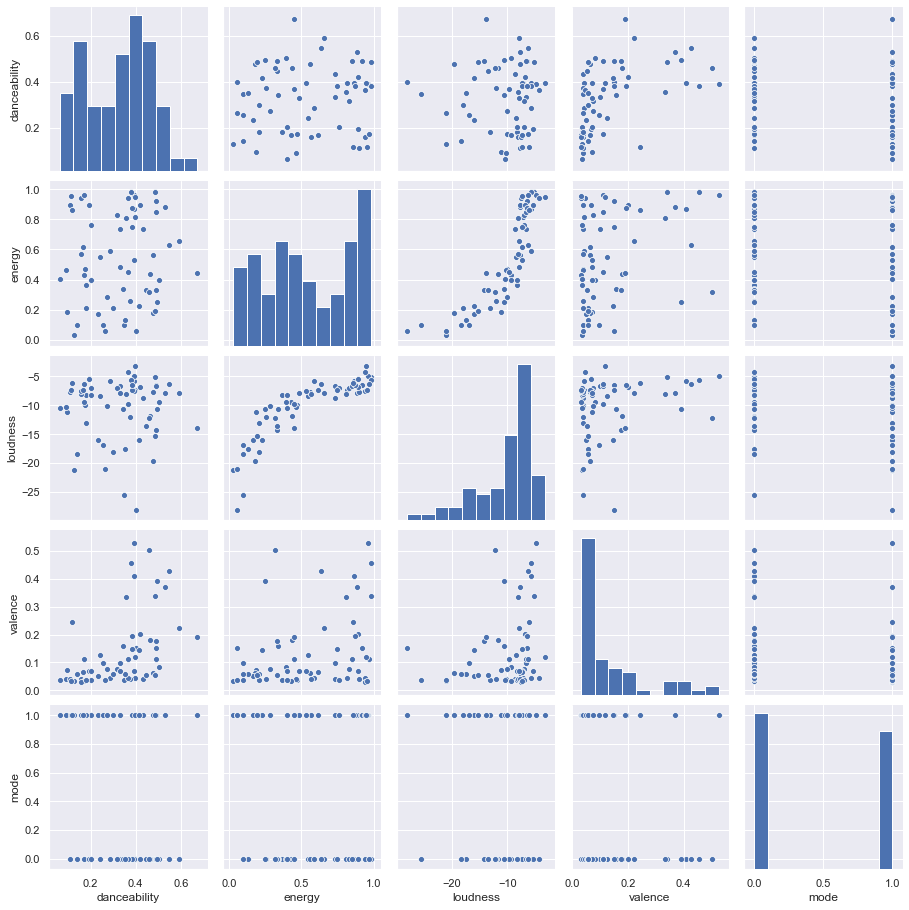

In [15]:
pairplot = sns.pairplot(spotify_int, vars = ["danceability","energy","loudness","valence","mode"]);
pairplot.savefig('Playlist_pairplot.png')

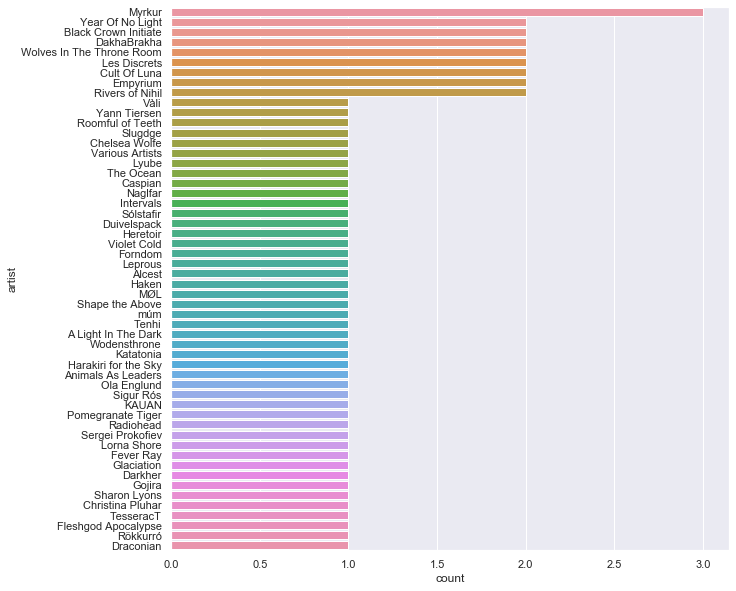

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=playlist_df, order=playlist_df["artist"].value_counts().index)
plt.savefig('Playlist_artists.png')
plt.show()

In [ ]:
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()